 **PROBLEM STATEMENT**

• **DOMAIN**: Industrial safety. NLP based Chatbot.

• **CONTEXT**:  

The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• **DATA DESCRIPTION**:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

*Columns description*:  

‣ **Data**: timestamp or time/date information

‣ **Countries**: which country the accident occurred (anonymised)

‣ **Local**: the city where the manufacturing plant is located (anonymised)

‣ **Industry sector**: which sector the plant belongs to

‣ **Accident level**: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ **Potential Accident Level**: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)

‣ **Genre**: if the person is male of female

‣ **Employee or Third Party**: if the injured person is an employee or a third party

‣ **Critical Risk**: some description of the risk involved in the accident

‣ **Description**: Detailed description of how the accident happened.



**PROJECT OBJECTIVE:**

Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description.



• **PROJECT TASK:** [ Score: 100 points]

1. **Milestone 1: [ Score: 40 points ]**

‣ Input: Context and Dataset

‣ Process:  

‣ Step 1: Import the data [ 3 points ]

‣ Step 2: Data cleansing [ 5 points ]

‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

‣ Step 6: Interim report [ 10 points ]

‣ Submission: Interim report, Jupyter Notebook with all the steps in
Milestone-1


2. **Milestone 2: [ Score: 60 points ]**

‣ Input: Preprocessed output from Milestone-1

‣ Process:  

‣ Step 1: Design, train and test Neural networks classifiers [ 5 points ]

‣ Step 2: Design, train and test RNN or LSTM classifiers [ 10 points ]

‣ Step 3: Choose the best performing classifier and pickle it. [ 5 points ]

‣ Step 4: Final Report [40 Points]

‣ Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2

3. **Milestone 3: [ Optional ]**

‣ Process:

‣ Step 1: Design a clickable UI based chatbot interface  

‣ Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface




In [1]:
#Import Required Libraries
!pip install scikit-learn

# To read and manipulate the data
import pandas as pd
import numpy as np

# To visualise data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To load the natural language toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Download required resources for nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

# To use regular expressions for manipulating text data
import re

# To create wordcloud
from wordcloud import WordCloud

# For n-grams
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# To apply TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# To apply Bag of Words
from sklearn.feature_extraction.text import CountVectorizer


# Suppressing the warnings.
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Milestone 1: [ Score: 40 points ]
‣ Input: Context and Dataset

‣ Process:

‣ Step 1: Import the data [ 3 points ]

‣ Step 2: Data cleansing [ 5 points ]

‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

‣ Step 6: Interim report [ 10 points ]

**Step 1 :- Import the data**

In [2]:
# Import the data
df = pd.read_excel('Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx')
df.head()



,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


**Step 2: Data cleansing**

In [3]:
# shape of the data
print('The data has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The data has 425 rows and 11 columns


In [4]:
# check data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


As per above information, data set doesn't null value in any column. Column 'Data' is datetime format . 0th Column , looks just represeting record number . we can drop as not contributing in any sort of feature for data set. Other columns are categorical or object type.

In [5]:
#Dropping 0th column
df = df.drop(df.columns[0], axis=1)
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Genre                     425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [7]:
#check the null or missing values
df.isnull().sum()

,0
Data,0
Countries,0
Local,0
Industry Sector,0
Accident Level,0
Potential Accident Level,0
Genre,0
Employee or Third Party,0
Critical Risk,0
Description,0


In [8]:
#Checking duplicate record
df.duplicated().sum()

7

In [9]:
# Displaying duplicate rows
duplicates = df[df.duplicated()]
duplicates.head(10)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


From above duplicate record, looks only record present at Index 3 and 4 are true duplicate as description seems also matching. Let's compare the description of these two index. If matching we can drop one of the record.

In [10]:
index_3_description = duplicates.iloc[3]['Description']
index_4_description = duplicates.iloc[4]['Description']
if(index_3_description == index_4_description):
    print("True Duplicate")
else:
    print("False Duplicate")

True Duplicate


In [11]:
#Let's now drop duplicate rows from datframe present at index 346.
df = df.drop(index=346)

# Displaying duplicate post dropping true duplicate
duplicates = df[df.duplicated()]
duplicates.head(10)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


Now the dataset not having true duplicate. All the above record having different description. So these are not true duplicate.

In [12]:
# Check for NA values
na_columns = df.isna().any()
print(na_columns)

Data                        False
Countries                   False
Local                       False
Industry Sector             False
Accident Level              False
Potential Accident Level    False
Genre                       False
Employee or Third Party     False
Critical Risk               False
Description                 False
dtype: bool


In [13]:
# Check for empty/blank strings
empty_columns = (df == '').any()
print(empty_columns)

Data                        False
Countries                   False
Local                       False
Industry Sector             False
Accident Level              False
Potential Accident Level    False
Genre                       False
Employee or Third Party     False
Critical Risk               False
Description                 False
dtype: bool


In [14]:
# Rename 'Data' column to 'Date' as it hold date information
df.rename(columns={'Data':'Date'}, inplace=True)

# Get the top 2 rows
df.head(2)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


As per above information, There is no NA or empty/blank value in column.

Following features can be extracted from the data column

*   Year
*   Month
*   Day


In [15]:
# Extract Features from the Date column
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Day'] = df.Date.apply(lambda x : x.day)
df['Year-Month'] = df['Date'].dt.strftime('%Y-%m')

df.head(3)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month,Day,Year-Month
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,2016-01
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,2016-01
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,2016-01


**Let's perform now some EDA on dataset to analyse data pattern.**

In [17]:
#unique values present in each attribute except the Description
for column in df.columns:
    if column not in ['Description', 'Date']:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'Countries':
['Country_01' 'Country_02' 'Country_03']

Unique values in 'Local':
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']

Unique values in 'Industry Sector':
['Mining' 'Metals' 'Others']

Unique values in 'Accident Level':
['I' 'IV' 'III' 'II' 'V']

Unique values in 'Potential Accident Level':
['IV' 'III' 'I' 'II' 'V' 'VI']

Unique values in 'Genre':
['Male' 'Female']

Unique values in 'Employee or Third Party':
['Third Party' 'Employee' 'Third Party (Remote)']

Unique values in 'Critical Risk':
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates'

* There are records of accidents from 1st Jan 2016 to 9th July 2017.

* Plant is located at 12 cities which belongs to 3 countries.

* Data available is related to 3 Industry Sectors like Metals, Mining and others.

* Each accident can be classified into any one of the six Accident Level. Higher the Accident Level Higher the severity.

* Accidents are related to both Male and Female.

* Employees are classified as into three categories such as Employee, Third Party and Third Party (Remote).

* Critical Risk feature contains most unique values and may be it can explain the Accident Level along with the Description.

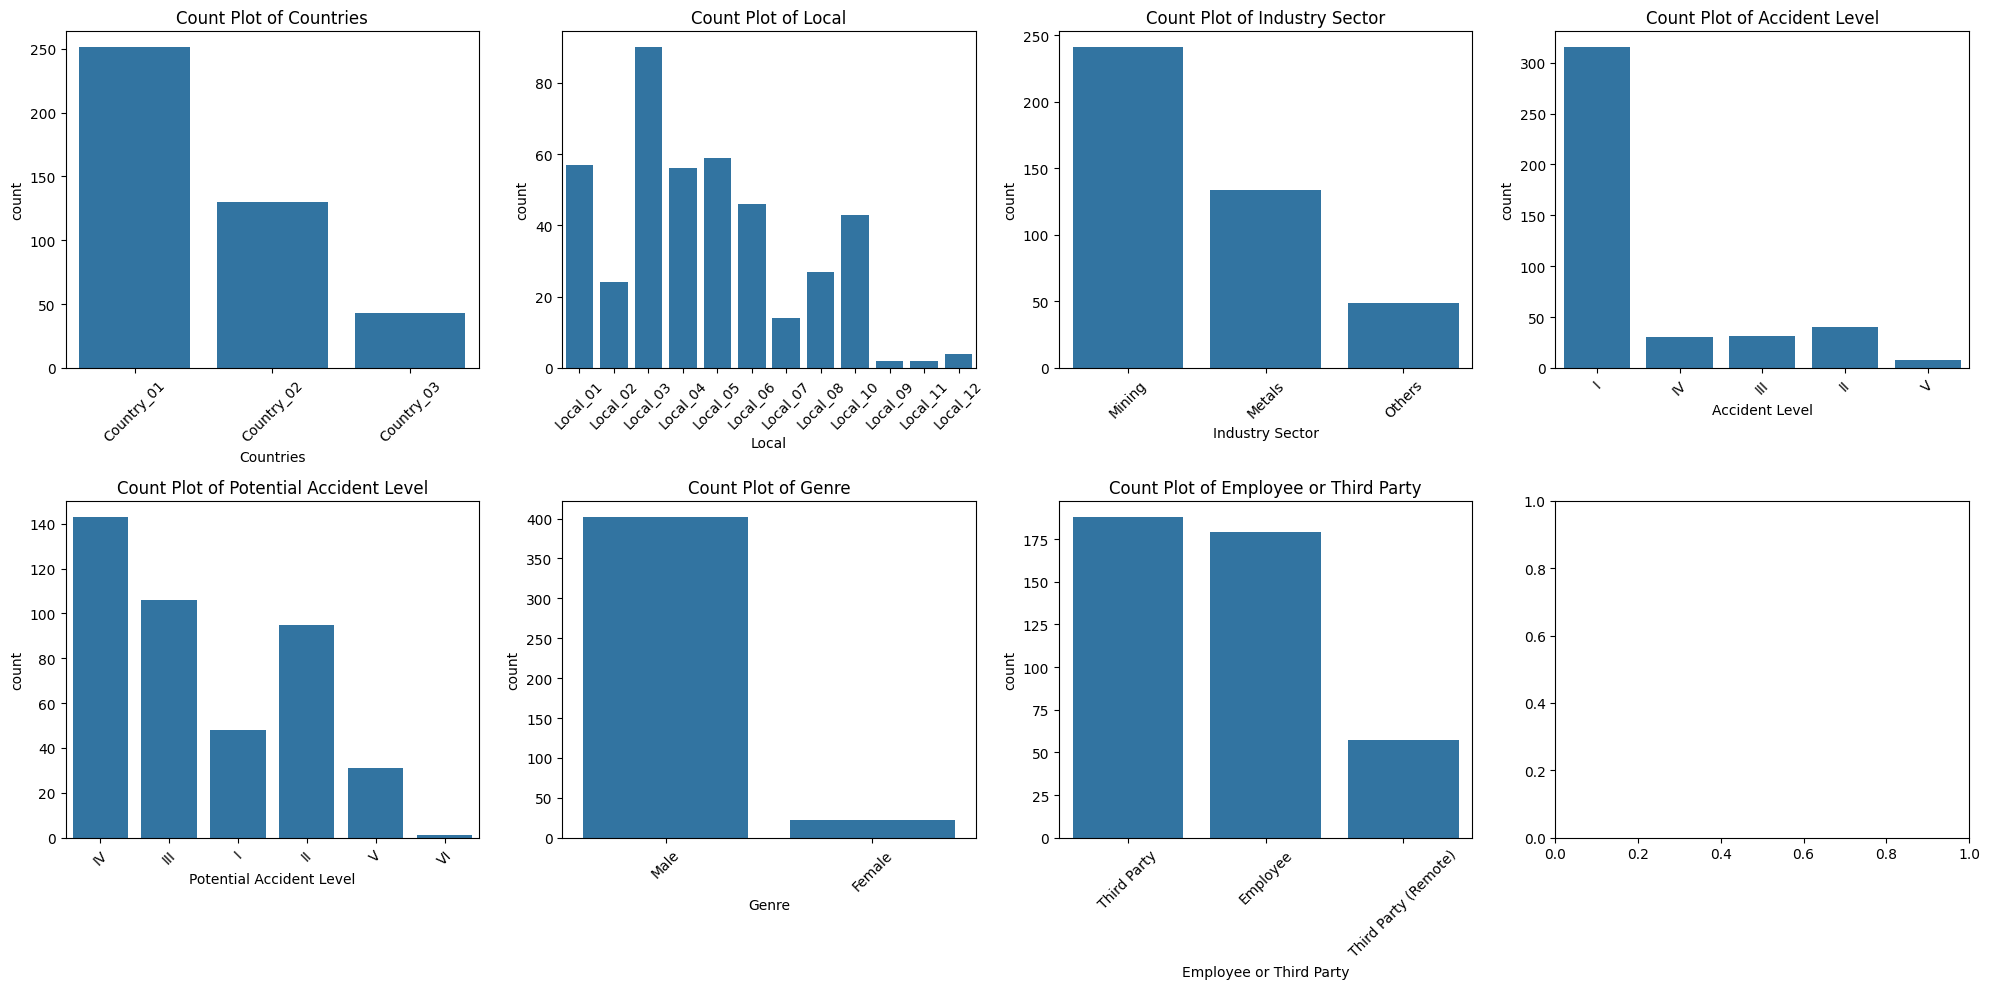

In [20]:
# List of columns to create count plots for
columns_to_plot = ['Countries', 'Local', 'Industry Sector', 'Accident Level',
                   'Potential Accident Level', 'Genre', 'Employee or Third Party']

# Createing a figure and an array of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figsize as needed

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()




*   From above visualization, it is evident that data set having post population are from Accident Level I. Other accident levels data are in very small proportion.  It is reflecting data imbalance .
*   Male population in data set is significantly higher than female population.
*   Critical description population are mostly bucketed under 'Other' category.



In [18]:
#Function To Create Pier Chart Metrics for the appropraite categorical columns from the supplied Data Frame
def df_pie_chart_metrix(df):
  cat_cols = list(df.select_dtypes(include='object').columns)
  pie_cols = []
  for column in cat_cols:
    if df[column].nunique() < 5: #if we have more than 5 labels in categorical column it will not be appropriate to visualize it in pie chart.
      pie_cols.append(column)

  columns = 2 #fixing the number of columns so that Pie Chart Metrics would look good visually
  rows = 2

  fig, ax = plt.subplots(rows, columns , figsize=(8, 8))
  for i in range(0,rows) :
    for j in range(0,columns) :
      ax[i, j].pie(
          df[pie_cols[i*columns+j]].value_counts(),
          labels=df[pie_cols[i*columns+j]].unique(),
          autopct='%1.1f%%',
          textprops={'size': 'smaller'},
          shadow=True,
          colors=sns.color_palette('Set2')
          )
      ax[i, j].set_title(pie_cols[i*columns+j])
  plt.tight_layout()
  plt.show()

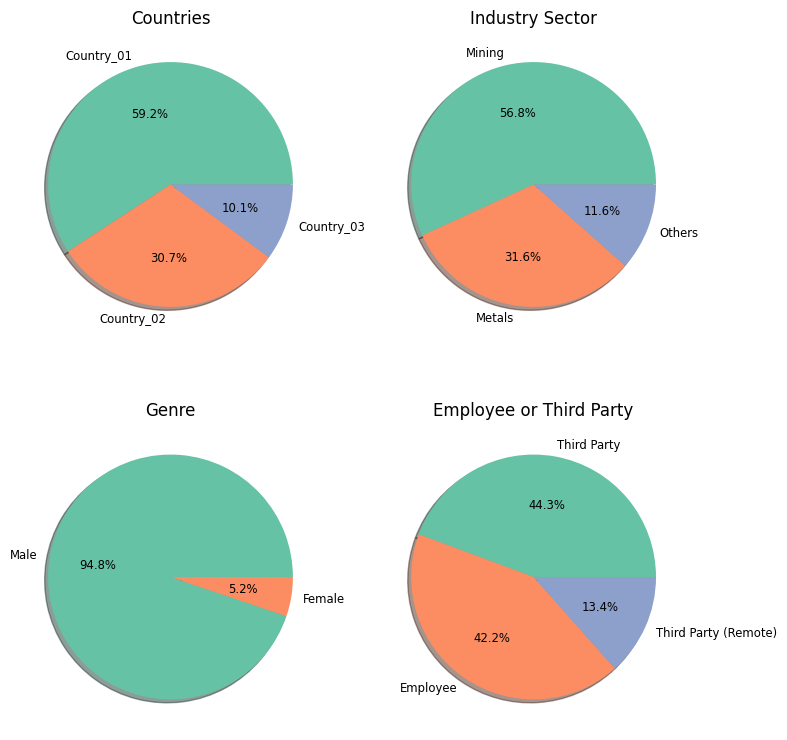

In [19]:
df_pie_chart_metrix(df)

In [23]:
fig = px.bar(df['Local'].value_counts().reset_index(), x="Local", y="count", color="Local", text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [25]:
fig = px.bar(df['Critical Risk'].value_counts().reset_index(), x="Critical Risk", y="count", color="Critical Risk", text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [27]:
fig = px.bar(df['Accident Level'].value_counts().reset_index(), x="Accident Level", y="count", color="Accident Level", text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

* Most Accident happened in Country - 01.

* Mining Industry sector is prone to the Accidents as 57% of accidents are related to Mining Industry

* Nearly 95% of the accidents were caused by Male Employeed. However as data is relaated to Mining and Metal Industry this percentage seems ok as most of workers will be Male.

* Employees on the payroll and Third Party Employee equally contributes to the number of accidents. Very few accidents were caused by the Remote Emplyees.

* Least accident happened in local-9 and local 11 which is 2.

* For more than half of the Accident the Critical Risk is mentioned as others. Which means for most of the accident critical risk involved is too large or can not be determined. Here SME can help the industry to assess the critical risk involved in the accident.

* Out of 424 accidents 315 accidents are of accident level 1 which means nearly 75% of the accidents are of least severity

* From Machine Learning perspective clearly there is significant class imbalance in the target variable.

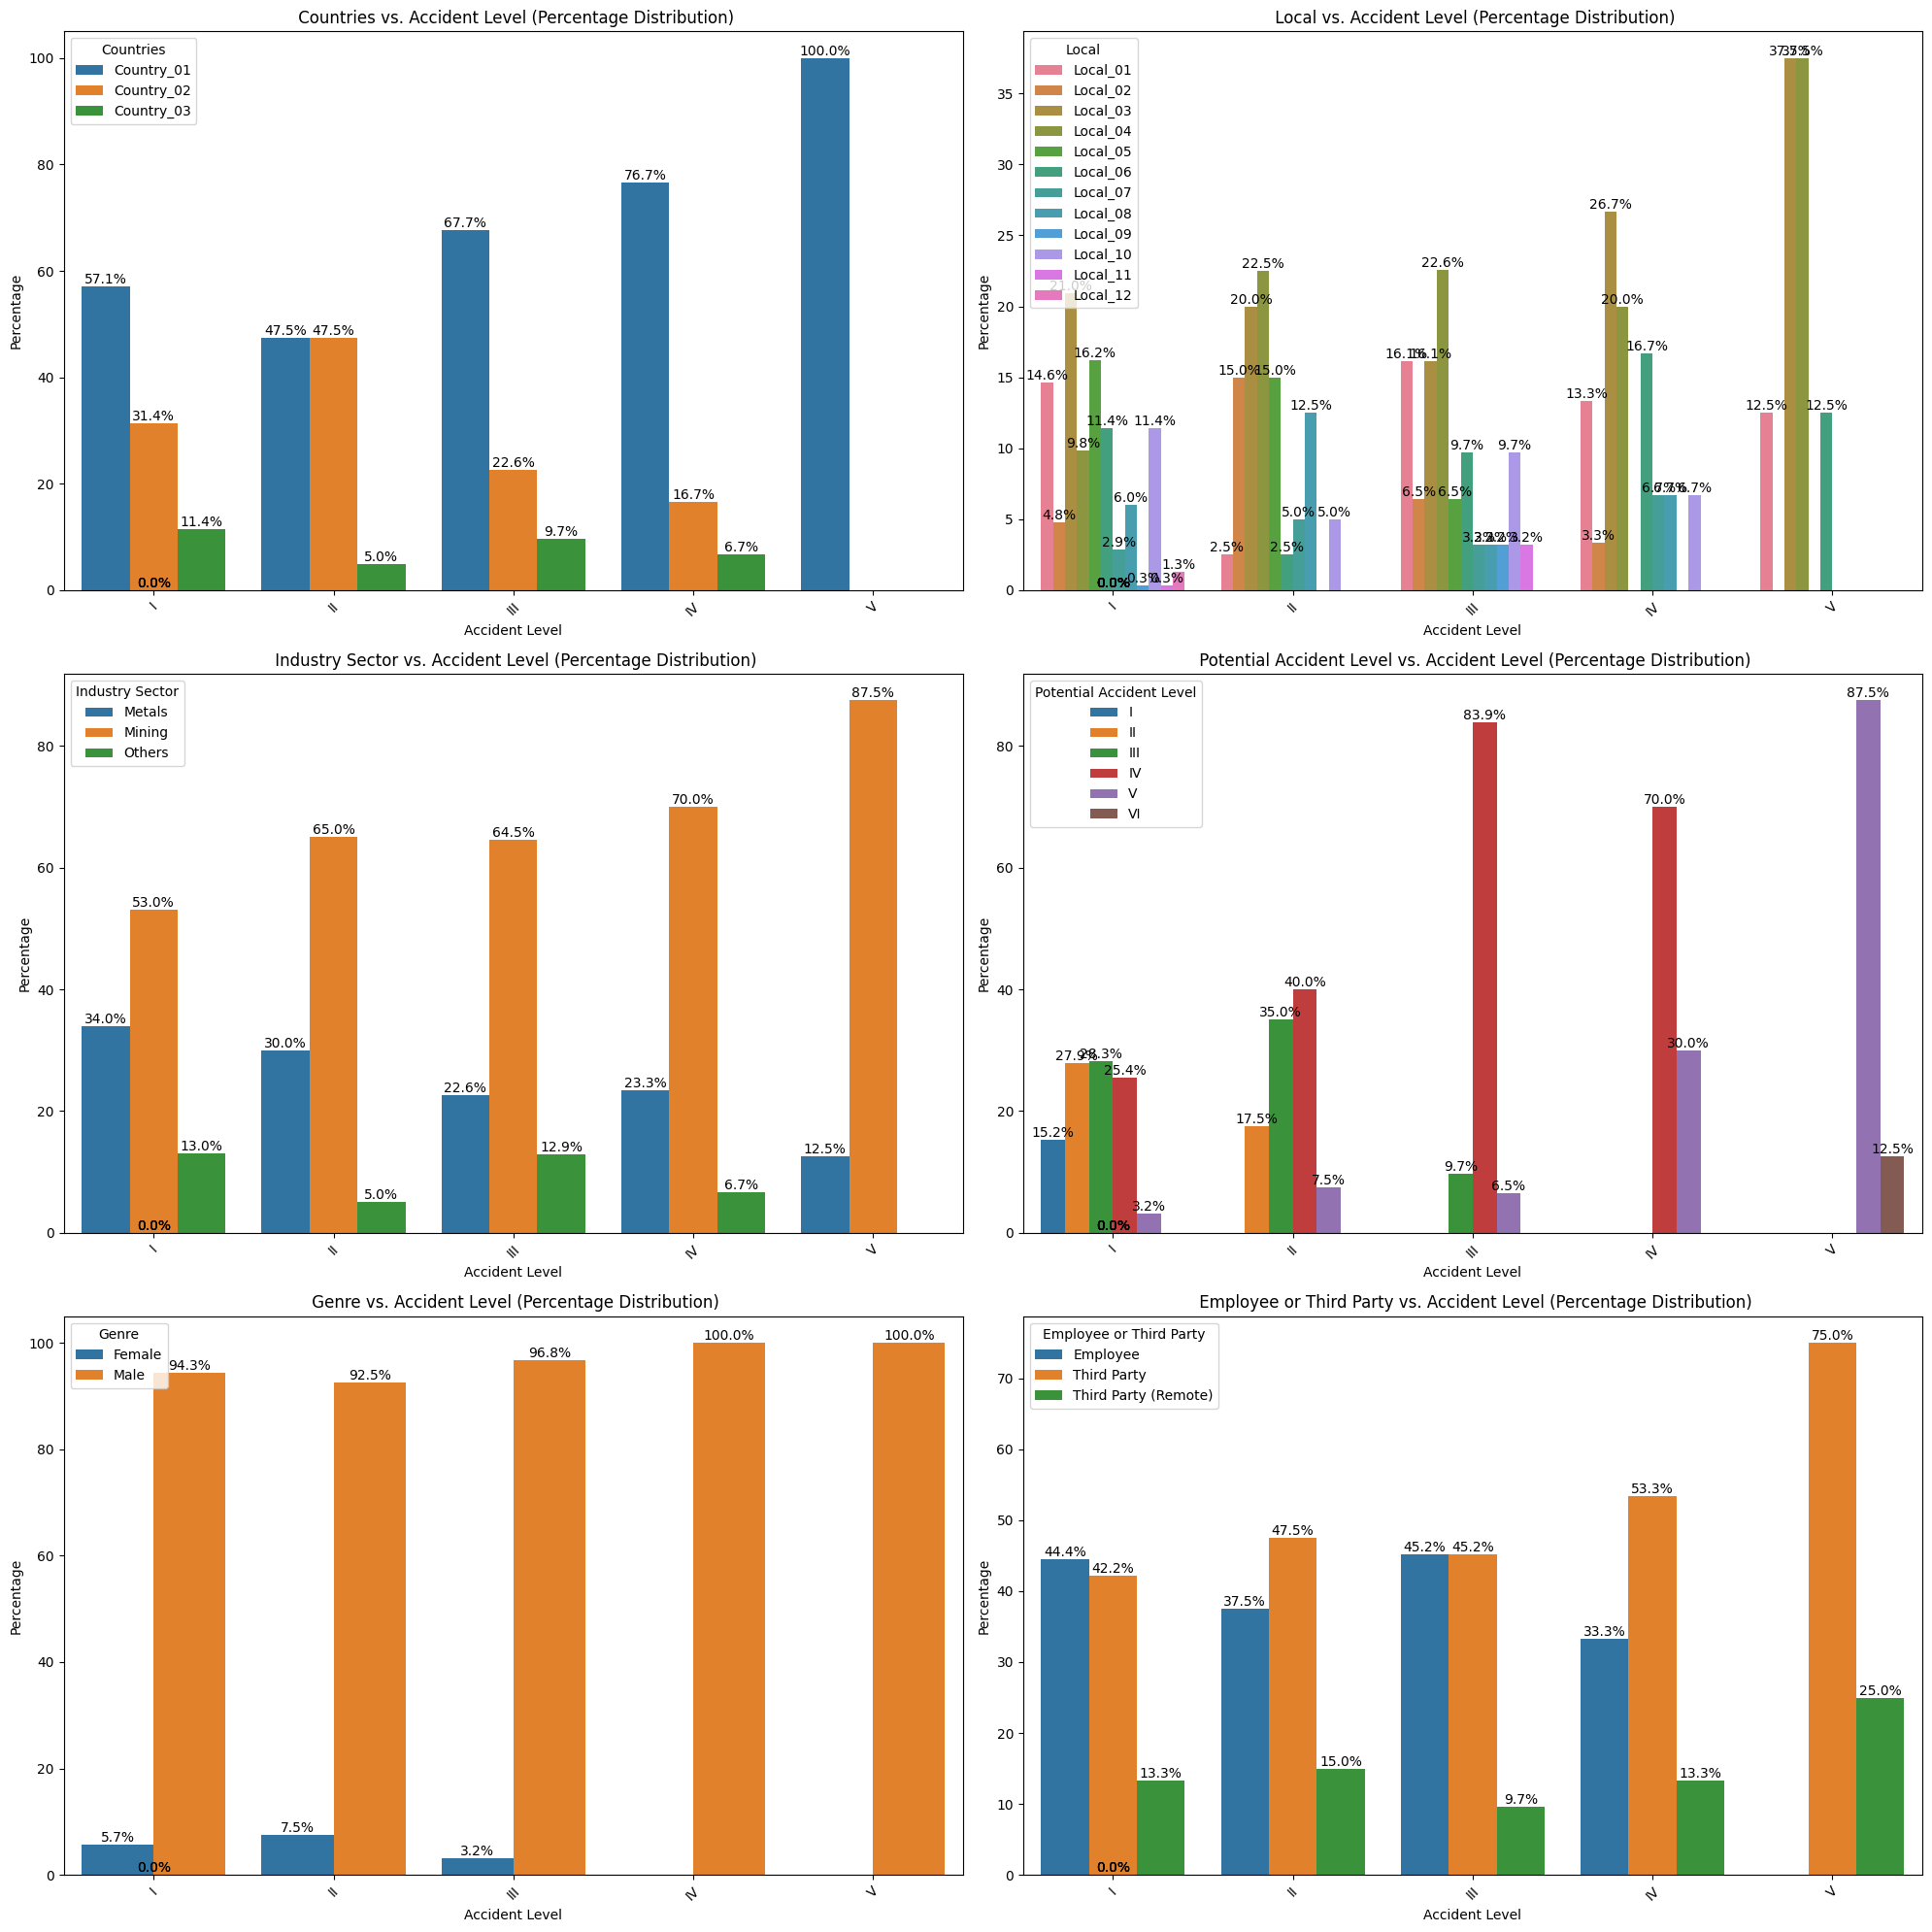

In [28]:
# List of columns for bivariate analysis with countPlot
columns_to_analyze = ['Countries', 'Local', 'Industry Sector',
                   'Potential Accident Level', 'Genre', 'Employee or Third Party']

# figure and an array of subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.flatten()

# Loop through the columns and create stacked bar plots with percentage distribution
for i, column in enumerate(columns_to_analyze):
    # Group data by 'Accident Level' and the current column, then count occurrences
    grouped_data = df.groupby(['Accident Level', column]).size().reset_index(name='Count')

    # Calculate percentage distribution within each 'Accident Level'
    total_counts = grouped_data.groupby('Accident Level')['Count'].transform('sum')
    grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

    # Create a stacked bar plot using seaborn with percentage labels
    ax = sns.barplot(x='Accident Level', y='Percentage', hue=column, data=grouped_data, ax=axes[i])

    # Add percentage labels on top of each bar
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center', va='bottom')

    axes[i].set_title(f' {column} vs. Accident Level (Percentage Distribution)')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

In [29]:
def stacked_bar_chart(df,column):
  fig = px.bar(
    df.groupby(column)['Accident Level'].value_counts().reset_index(),
    x=column,
    y='count',
    color='Accident Level',
    barmode='stack',
    text_auto=True
    )
  fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
  fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
  fig.show()

In [32]:
stacked_bar_chart(df,'Countries')

In [33]:
stacked_bar_chart(df,'Industry Sector')

In [37]:
stacked_bar_chart(df,'Genre')

In [38]:
stacked_bar_chart(df,'Employee or Third Party')



**Key Insights from above Analysis:**


* Across most categories (Countries, Local, Industry Sector, Potential Accident Level, Genre, Employee or Third Party), Accident Level I is the most frequent, indicating a higher occurrence of less severe accidents. This suggests that most safety measures are effective in preventing major incidents.

* Country 2 exhibit a higher proportion of Level I, II and III accidents . This highlights potential areas for focused safety interventions and risk mitigation strategies.

* Country 1 exhibit a higher proportion of amongall level of accidents compared to other countries. This highlights potential areas for focused safety interventions and risk mitigation strategies.

* Mining Sector Has Most Accidents, Metals Sector Shows Higher Severity: The 'Mining' sector has the highest number of accidents across all levels, indicating a higher risk environment. The 'Metals' sector, while having fewer accidents overall, has a relatively higher proportion of Level IV accidents, suggesting a higher potential for severe incidents.

* Potential Accident Level Strongly Correlated with Actual Accident Level: There's a strong correlation between 'Potential Accident Level' and 'Accident Level', meaning that higher potential accident levels are associated with higher actual accident levels. This emphasizes the importance of proactive risk assessment and addressing potential hazards before they escalate.

* Males and Employees Involved in Most Accidents: The majority of accidents involve males and employees. While this could be influenced by workforce demographics, it is important to ensure safety measures are inclusive and address the specific needs of all employee groups.

* Third Parties Involved in More Severe Accidents: Level IV and V accidents have a greater proportion involving third parties compared to other levels. This suggests the need for safety protocols and training to address risks involving external personnel.


**Time Series based visualization**

In [39]:

fig = px.line(df.groupby('Year-Month')['Accident Level'].value_counts().reset_index(),
              x='Year-Month',
              y='count',
              color='Accident Level',
              text='count'
              )
fig.update_traces(textposition="bottom right")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
#rotate x axis label
fig.update_layout(xaxis_tickangle=-45)
fig.show()

**Insights -**

* The source data timeline ranges from Jan 2016 To Jul 2017.

* Majority of the accidents are of level 1.

* In the Year 2016 Number of Accidents increased till Jun 2016 and then suddenly dropped in Jul 2016.

* Maximum accidents of 30 occured in the month Jun 2016.
Year 2017 started with 21 accident which was maximum in that year.

* In Year 2017 starting from Jan 2017 accidents dropped and again increased in the subsequent month till Jul 2017.

**Recommendation from above analysis :-**

* Focus on Preventive Measures: Given the predominance of Accident Level I, prioritize preventive measures to maintain a low rate of less severe accidents.

* Targeted Interventions: Implement targeted safety interventions in Country 1 and 2 to address the higher proportion of Level III and IV accidents.

* Mining and Metals Sector Safety: Enhance safety protocols and training in the 'Mining' and 'Metals' sectors, focusing on risk assessment and hazard identification.

* Proactive Risk Management: Prioritize proactive risk management and address potential hazards before they escalate into actual accidents, as indicated by the correlation between 'Potential Accident Level' and 'Accident Level'.


* Inclusive Safety: Ensure safety measures are inclusive and address the specific needs of all employee groups, including males and females.

* Third-Party Safety: Develop safety protocols and training to address risks involving third parties, particularly in higher-risk situations.


**With above information, to build classification model , we will use**

**Target Variable** :- "Acciden Level"

**Feature** :- Data , Countries, Local,Industry sector,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description




 **Step 3:- Data preprocessing (NLP Preprocessing techniques)**

In [40]:
#Make copy of the cleanesed data
df_copy = df.copy();

In [41]:
#Create one hot enconding on categorical variable
encoded_df = pd.get_dummies(df_copy, columns=['Countries', 'Local', 'Industry Sector', 'Potential Accident Level', 'Genre', 'Employee or Third Party','Critical Risk'])
encoded_df.head()

,Date,Accident Level,Description,Year,Month,Day,Year-Month,Countries_Country_01,Countries_Country_02,Countries_Country_03,...,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco
0,2016-01-01,I,While removing the drill rod of the Jumbo 08 f...,2016,1,1,2016-01,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2016-01-02,I,During the activation of a sodium sulphide pum...,2016,1,2,2016-01,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2016-01-06,I,In the sub-station MILPO located at level +170...,2016,1,6,2016-01,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2016-01-08,I,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,2016-01,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2016-01-10,IV,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,2016-01,True,False,False,...,False,False,False,False,False,False,False,False,False,False


 **Apply comprehensive Text preprocessing**

In [42]:
#Function to perform normalization ,stop word removal , remove punctuation, remove special character , stemming and lemmatization
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # 3. Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 4. Tokenize into words
    words = nltk.word_tokenize(text)

    # 5. Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # 6. Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # 7. Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # 8. Join words back into a string
    processed_text = ' '.join(words)

    return processed_text

In [43]:
# Apply preprocessing to the 'Description' column
encoded_df['Processed Description'] = encoded_df['Description'].apply(preprocess_text)

In [44]:
encoded_df[['Description','Processed Description']]

,Description,Processed Description
0,While removing the drill rod of the Jumbo 08 f...,remov drill rod jumbo 08 mainten supervisor pr...
1,During the activation of a sodium sulphide pum...,activ sodium sulphid pump pipe uncoupl sulfid ...
2,In the sub-station MILPO located at level +170...,substat milpo locat level 170 collabor excav w...
3,Being 9:45 am. approximately in the Nv. 1880 C...,945 approxim nv 1880 cx695 ob7 personnel begin...
4,Approximately at 11:45 a.m. in circumstances t...,approxim 1145 circumst mechan anthoni group le...
...,...,...
420,"Being approximately 5:00 a.m. approximately, w...",approxim 500 approxim lift kelli hq toward pul...
421,The collaborator moved from the infrastructure...,collabor move infrastructur offic julio toilet...
422,During the environmental monitoring activity i...,environment monitor activ area employe surpris...
423,The Employee performed the activity of strippi...,employe perform activ strip cathod pull cathod...


**Let's visualize the Word Cloud**

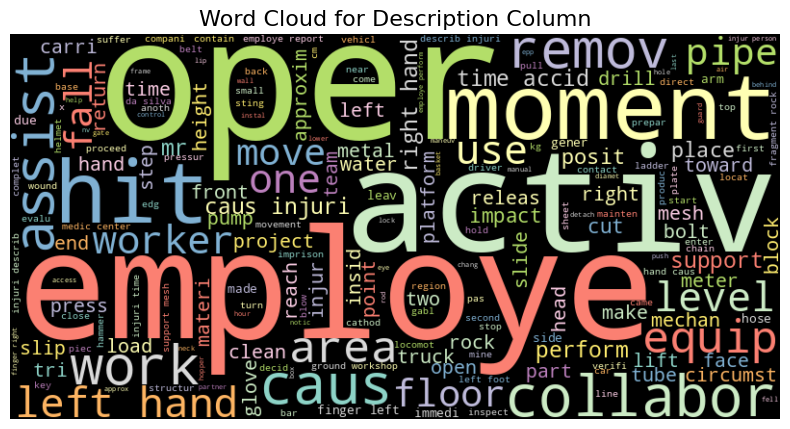

In [46]:
# Combine all descriptions into a single string
text = " ".join(encoded_df['Processed Description'].astype(str))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set3_r').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud for Description Column", fontsize=16)
plt.show()

**Let's visualize the unigram and bigram distribution of attribue with respect to Accident Level**

In [47]:
# Function to generate n-gram frequency distribution per Accident Level
def ngram_freq_by_accident_level(df, column, group_col, n=2):
    grouped_ngrams = []

    # Group by 'Accident Level' and process each group
    for level, group in df.groupby(group_col):
        all_ngrams = []

        for text in group[column]:
            tokens = word_tokenize(text.lower())  # Tokenize and lowercase
            n_grams = list(ngrams(tokens, n))  # Generate n-grams
            all_ngrams.extend(n_grams)  # Collect all n-grams

        fdist = FreqDist(all_ngrams)  # Compute frequency distribution
        top_ngrams = fdist.most_common(5)  # Get top 10 n-grams

        # Store results in a structured format
        for ngram, count in top_ngrams:
            grouped_ngrams.append({'Accident Level': level, 'N-gram': ' '.join(ngram), 'Count': count})

    return pd.DataFrame(grouped_ngrams)

In [48]:
# unigrams
ngram_df = ngram_freq_by_accident_level(encoded_df, 'Processed Description', 'Accident Level', n=1)
ngram_df


,Accident Level,N-gram,Count
0,I,employe,138
1,I,caus,132
2,I,hand,116
3,I,right,113
4,I,left,107
5,II,caus,25
6,II,employe,23
7,II,hand,21
8,II,right,19
9,II,left,14


In [49]:
# bigrams
ngram_df = ngram_freq_by_accident_level(encoded_df, 'Processed Description', 'Accident Level', n=2)

ngram_df

,Accident Level,N-gram,Count
0,I,time accid,42
1,I,right hand,40
2,I,left hand,39
3,I,caus injuri,38
4,I,employe report,22
5,II,left hand,7
6,II,right hand,7
7,II,caus injuri,6
8,II,caus cut,4
9,II,finger right,4


**Let's now create vectorized format of Processed Description and extract featiure out of this . Then we will create combine dataFrame with extracted feature.**

-----------------------------------------------------

***Using TF-IDF vectorizer***



In [58]:
#Createing TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer()

#Fit the vectorizer to the 'Processed Description' column
vectorizer_tfidf.fit(encoded_df['Processed Description'])

#Transform the 'Processed Description' column into TF-IDF features
tfidf_features = vectorizer_tfidf.transform(encoded_df['Processed Description'])

#Get feature names
feature_names = vectorizer_tfidf.get_feature_names_out()

#Create a DataFrame from TF-IDF features
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=feature_names)

In [59]:
tfidf_df

,001,0010,007,01,01022017,01242017,0130,0150,018,0183,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.187329,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Get the encoded data frame with extracted feature from TFID having no 'Description' and 'Processed Description' column for further processing

In [60]:
#Concatenate the TF-IDF DataFrame with the encoded DataFrame
encoded_df = encoded_df.reset_index(drop=True)
tfidf_df = tfidf_df.reset_index(drop=True)

In [71]:
#Concatenate the TF-IDF DataFrame with the encoded DataFrame
final_df_TFIDF = pd.concat([encoded_df, tfidf_df], axis=1)

# Drop 'Description', 'Processed Description',Year-Month and Date columns
final_df_TFIDF = final_df_TFIDF.drop(columns=['Description', 'Processed Description','Date','Year-Month'])

# Now 'final_df_TFIDF' contains the encoded features and TF-IDF features  without 'Description', 'Processed Description',Year-Month and Date columns
final_df_TFIDF.head()

,Accident Level,Year,Month,Day,Countries_Country_01,Countries_Country_02,Countries_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,I,2016,1,1,True,False,False,True,False,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,I,2016,1,2,False,True,False,False,True,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,I,2016,1,6,True,False,False,False,False,True,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,I,2016,1,8,True,False,False,False,False,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,IV,2016,1,10,True,False,False,False,False,False,...,0.0,0.0,0.0,0.187329,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
encoded_df.shape , final_df_TFIDF.shape

((424, 70), (424, 2717))

----------------------------------------------------------

***Using Bag of Words***

In [73]:
# Initialize CountVectorizer
vectorizer_bow = CountVectorizer()

# Fit and transform the text data
bow_matrix = vectorizer_bow.fit_transform(encoded_df['Processed Description'])

# Convert the result into a DataFrame for better readability
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer_bow.get_feature_names_out())

bow_df

,001,0010,007,01,01022017,01242017,0130,0150,018,0183,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Concatenate the bow_df DataFrame with the encoded DataFrame
bow_df = bow_df.reset_index(drop=True)

#Concatenate the BoW DataFrame with the encoded DataFrame
final_bow_df = pd.concat([encoded_df, bow_df], axis=1)

# Drop 'Description', 'Processed Description',Year-Month and Date columns
final_bow_df = final_bow_df.drop(columns=['Description', 'Processed Description','Date','Year-Month'])

# Now 'final_bow_df' contains the encoded features and BoW features  without 'Description', 'Processed Description',Year-Month and Date columns
final_bow_df.head()

,Accident Level,Year,Month,Day,Countries_Country_01,Countries_Country_02,Countries_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,I,2016,1,1,True,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,I,2016,1,2,False,True,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
2,I,2016,1,6,True,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
3,I,2016,1,8,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,IV,2016,1,10,True,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0


In [75]:
encoded_df.shape , final_bow_df.shape

((424, 70), (424, 2717))

**Step 4: Data preparation - Cleansed data in .xlsx or .csv file**

In [76]:
final_df_TFIDF.to_csv('final_df_TFIDF.csv', index=False)
final_bow_df.to_csv('final_bow_df.csv', index=False)

**Step 5: Design train and test basic machine learning**

In [77]:

# apply z-score on Year, Month and Day column
from scipy.stats import zscore

# Apply Z-score on TFIDF dataframe
final_df_TFIDF['Year'] = final_df_TFIDF['Year'].transform(zscore)
final_df_TFIDF['Month'] = final_df_TFIDF['Year'].transform(zscore)
final_df_TFIDF['Day'] = final_df_TFIDF['Year'].transform(zscore)

final_df_TFIDF.head(5)


,Accident Level,Year,Month,Day,Countries_Country_01,Countries_Country_02,Countries_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,I,-0.698369,-0.698369,-0.698369,True,False,False,True,False,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,I,-0.698369,-0.698369,-0.698369,False,True,False,False,True,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,I,-0.698369,-0.698369,-0.698369,True,False,False,False,False,True,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,I,-0.698369,-0.698369,-0.698369,True,False,False,False,False,False,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,IV,-0.698369,-0.698369,-0.698369,True,False,False,False,False,False,...,0.0,0.0,0.0,0.187329,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# Apply Z-score on BoW dataframe
final_bow_df['Year'] = final_bow_df['Year'].transform(zscore)
final_bow_df['Month'] = final_bow_df['Year'].transform(zscore)
final_bow_df['Day'] = final_bow_df['Year'].transform(zscore)

final_bow_df.head(5)

,Accident Level,Year,Month,Day,Countries_Country_01,Countries_Country_02,Countries_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,I,-0.698369,-0.698369,-0.698369,True,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,I,-0.698369,-0.698369,-0.698369,False,True,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
2,I,-0.698369,-0.698369,-0.698369,True,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
3,I,-0.698369,-0.698369,-0.698369,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,IV,-0.698369,-0.698369,-0.698369,True,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0


In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [84]:
#Separate features (X) and target (y)
X = final_df_TFIDF.drop('Accident Level', axis=1)  # Features
y = final_df_TFIDF['Accident Level']  # Target variable

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target variable
le.fit(y)

# Transform your target variable
y = le.transform(y)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

#Define a list of classifiers
classifiers = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]

#Train and evaluate each classifier
results = []
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    results.append([classifier.__class__.__name__, accuracy, precision, recall, f1])

#Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [85]:
#Print the results
results_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.847059,0.771755,0.847059,0.802014
1,DecisionTreeClassifier,0.800000,0.782272,0.800000,0.784214
2,RandomForestClassifier,0.811765,0.658962,0.811765,0.727426
3,GradientBoostingClassifier,0.788235,0.701713,0.788235,0.739693
4,XGBClassifier,0.823529,0.763834,0.823529,0.772471
5,GaussianNB,0.811765,0.674841,0.811765,0.736997
6,KNeighborsClassifier,0.800000,0.665060,0.800000,0.726316
7,AdaBoostClassifier,0.823529,0.721899,0.823529,0.755820
8,BaggingClassifier,0.800000,0.686801,0.800000,0.736060
9,SVC,0.811765,0.658962,0.811765,0.727426


In [87]:
#Print Classification Report and Confusion Matrix for the best model
best_classifier = LogisticRegression(max_iter=1000)
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        69
           1       0.00      0.00      0.00         4
           2       0.50      0.25      0.33         4
           3       0.67      0.40      0.50         5
           4       0.00      0.00      0.00         3

    accuracy                           0.85        85
   macro avg       0.41      0.33      0.35        85
weighted avg       0.77      0.85      0.80        85



In [90]:
# Create confusion matrix
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix', cmap=plt.cm.Blues,best_classifier=best_classifier):
  cm = confusion_matrix(y_test, y_pred)

   # Map best_classifier.classes_ to custom labels
  if best_classifier is not None:
      class_mapping = {class_val: label for class_val, label in zip(best_classifier.classes_, ['I', 'II', 'III', 'IV', 'V'])}
      custom_labels = [class_mapping.get(class_val, str(class_val)) for class_val in best_classifier.classes_]
  else:
      custom_labels = ['I', 'II', 'III', 'IV', 'V']  # Default labels if best_classifier not provided


  # Plot confusion matrix with colormap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,
            xticklabels=custom_labels,
            yticklabels=custom_labels)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

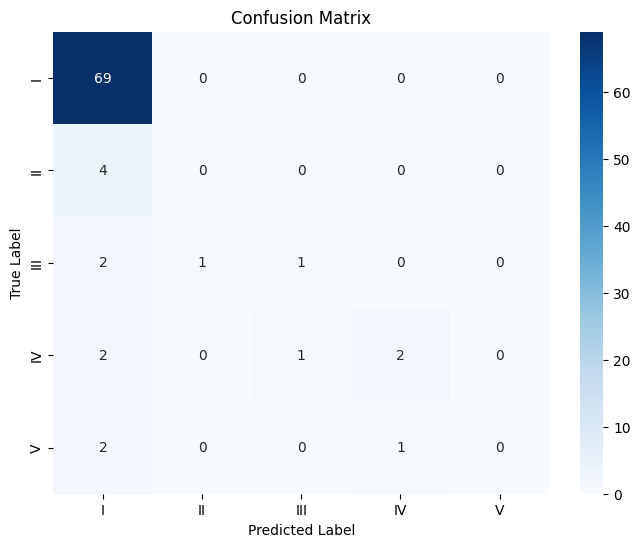

In [91]:
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix',plt.cm.Blues,best_classifier)

**Let's now apply SMOTE on training data and validate the accuracy**

In [94]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=min(5, len(np.unique(y_train)) - 1))
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [95]:
#Define a list of classifiers
classifiers_smote = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]

#Train and evaluate each classifier with oversampling
results_smote = []
for classifier in classifiers_smote:
    # Train the classifier
    classifier.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    results_smote.append([classifier.__class__.__name__, accuracy, precision, recall, f1])

#Create a DataFrame to display the results
results_smote_df = pd.DataFrame(results_smote, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [96]:
#result with oversampling
results_smote_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.823529,0.775542,0.823529,0.793440
1,DecisionTreeClassifier,0.717647,0.727451,0.717647,0.721681
2,RandomForestClassifier,0.811765,0.658962,0.811765,0.727426
3,GradientBoostingClassifier,0.811765,0.746779,0.811765,0.775521
4,XGBClassifier,0.752941,0.706353,0.752941,0.726471
5,GaussianNB,0.811765,0.674841,0.811765,0.736997
6,KNeighborsClassifier,0.541176,0.711061,0.541176,0.612895
7,AdaBoostClassifier,0.635294,0.696313,0.635294,0.663434
8,BaggingClassifier,0.752941,0.732353,0.752941,0.740274
9,SVC,0.717647,0.694118,0.717647,0.704981


In [99]:
#Print Classification Report and Confusion Matrix for the best model
best_classifier_smote = LogisticRegression(max_iter=1000)
best_classifier_smote.fit(X_train_resampled, y_train_resampled)
y_pred = best_classifier_smote.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        69
           1       0.00      0.00      0.00         4
           2       0.50      0.50      0.50         4
           3       0.50      0.20      0.29         5
           4       0.50      0.33      0.40         3

    accuracy                           0.82        85
   macro avg       0.47      0.40      0.42        85
weighted avg       0.78      0.82      0.79        85



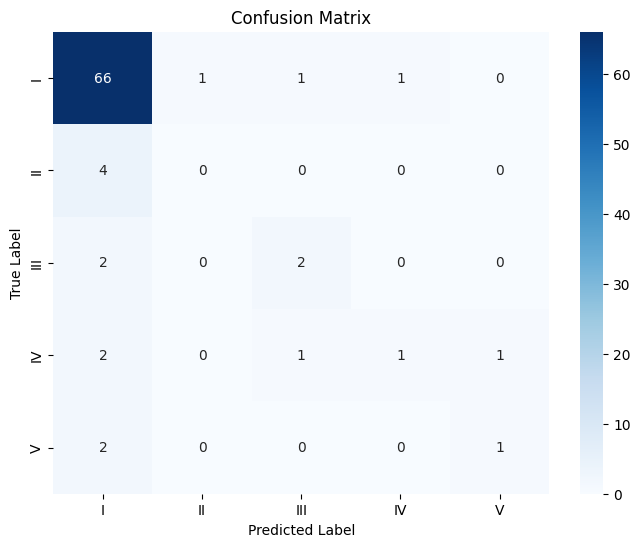

In [100]:
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix',plt.cm.Blues,best_classifier_smote)

**Apply PCA and evalaute to check performance improves**

In [101]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

In [102]:
# Define a list of classifiers
classifiers_pca = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]


# Train and evaluate each classifier with PCA
results_pca = []
for classifier in classifiers_pca:
    # Train the classifier
    classifier.fit(X_train_pca, y_train_resampled)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test_pca)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    results_pca.append([classifier.__class__.__name__, accuracy, precision, recall, f1])

# Create a DataFrame to display the results
results_pca_df = pd.DataFrame(results_pca, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [103]:
#Result with PCA
results_pca_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.811765,0.758543,0.811765,0.778294
1,DecisionTreeClassifier,0.576471,0.699930,0.576471,0.631226
2,RandomForestClassifier,0.776471,0.671324,0.776471,0.720016
3,GradientBoostingClassifier,0.764706,0.701238,0.764706,0.730710
4,XGBClassifier,0.741176,0.655656,0.741176,0.695798
5,GaussianNB,0.588235,0.730561,0.588235,0.650606
6,KNeighborsClassifier,0.658824,0.684021,0.658824,0.670692
7,AdaBoostClassifier,0.529412,0.706377,0.529412,0.589250
8,BaggingClassifier,0.705882,0.658188,0.705882,0.681201
9,SVC,0.694118,0.690252,0.694118,0.691562


**Insight**

* LogisticRegression without oversampling so far is having better accuracy
* With SMOTE(oversampling) , we are getting 2% of accuracy reduction compared to base model.  
* PCA doesn't seems improving balance.



**Let's try to use hyperparamter tuning and see model's performance**

In [105]:
from imblearn.pipeline import Pipeline  # Import Pipeline

In [106]:
# Pipeline with SMOTE and LogisticRegression
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Initialize with random_state
])

In [107]:
# Define Hyperparameter Grid for LogisticRegression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Solver algorithms for different penalties
    # Add 'class_weight' for handling class imbalance
    'classifier__class_weight': [None, 'balanced']
}

In [108]:
#Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=2)  # Use appropriate scoring
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=saga; total time=   0.2s
[CV] END classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, classifier__solver=saga; total time=   0.3s
[CV] END c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='f1_weighted', verbose=2)

In [109]:
#Get the Best Model and Results
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'classifier__C': 100, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [110]:
#Evaluate the Best Model
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89        69
           1       0.00      0.00      0.00         4
           2       0.50      0.50      0.50         4
           3       0.20      0.20      0.20         5
           4       0.50      0.33      0.40         3

    accuracy                           0.78        85
   macro avg       0.41      0.39      0.40        85
weighted avg       0.76      0.78      0.77        85



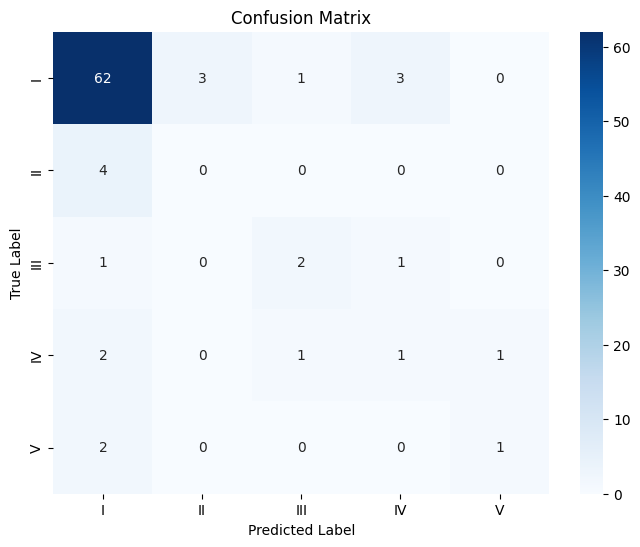

In [112]:
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix',plt.cm.Blues,best_model)

**Insight**

* With hyperparameter tuning also, we are not seeing perfromance improved compred to base model.

* LogisticRegression without oversampling so far is having better accuracy



Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        69
           1       0.00      0.00      0.00         4
           2       0.50      0.25      0.33         4
           3       0.67      0.40      0.50         5
           4       0.00      0.00      0.00         3

    accuracy                           0.85        85
   macro avg       0.41      0.33      0.35        85
weighted avg       0.77      0.85      0.80        85



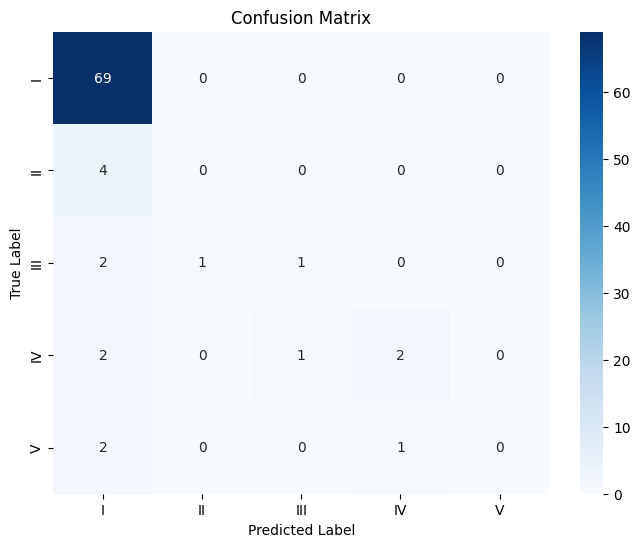

In [115]:
# So far we have below Best model performance result on test data.
# Classification Report and Confusion Matrix for the best model
best_classifier = LogisticRegression(max_iter=1000)
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix',plt.cm.Blues,best_classifier)

**Let's now use processed data with bag of words dataframe and run various model**

In [116]:
#Separate features (X) and target (y)
X_bow = final_bow_df.drop('Accident Level', axis=1)  # Features
y_bow = final_bow_df['Accident Level']  # Target variable

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target variable
le.fit(y_bow)

# Transform your target variable
y_bow = le.transform(y_bow)

#Split data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size=0.2, random_state=42)  # 80% train, 20% test

#Define a list of classifiers
classifiers_bow = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]

#Train and evaluate each classifier
results_bow = []
for classifier in classifiers_bow:
    # Train the classifier
    classifier.fit(X_train_bow, y_train_bow)

    # Make predictions on the test set
    y_pred_bow = classifier.predict(X_test_bow)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test_bow, y_pred_bow)
    precision = precision_score(y_test_bow, y_pred_bow, average='weighted')  # Use weighted for multi-class
    recall = recall_score(y_test_bow, y_pred_bow, average='weighted')
    f1 = f1_score(y_test_bow, y_pred_bow, average='weighted')

    # Store the results
    results_bow.append([classifier.__class__.__name__, accuracy, precision, recall, f1])

#Create a DataFrame to display the results
results_df_bow = pd.DataFrame(results_bow, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [117]:
#Print result
results_df_bow

,Classifier,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.764706,0.685256,0.764706,0.722804
1,DecisionTreeClassifier,0.741176,0.773620,0.741176,0.755069
2,RandomForestClassifier,0.811765,0.658962,0.811765,0.727426
3,GradientBoostingClassifier,0.788235,0.702564,0.788235,0.742377
4,XGBClassifier,0.835294,0.795324,0.835294,0.802721
5,GaussianNB,0.811765,0.666807,0.811765,0.732180
6,KNeighborsClassifier,0.800000,0.657143,0.800000,0.721569
7,AdaBoostClassifier,0.788235,0.671460,0.788235,0.725176
8,BaggingClassifier,0.835294,0.822658,0.835294,0.792078
9,SVC,0.811765,0.658962,0.811765,0.727426



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91        69
           1       0.00      0.00      0.00         4
           2       1.00      0.25      0.40         4
           3       0.00      0.00      0.00         5
           4       1.00      0.33      0.50         3

    accuracy                           0.82        85
   macro avg       0.57      0.31      0.36        85
weighted avg       0.77      0.82      0.78        85



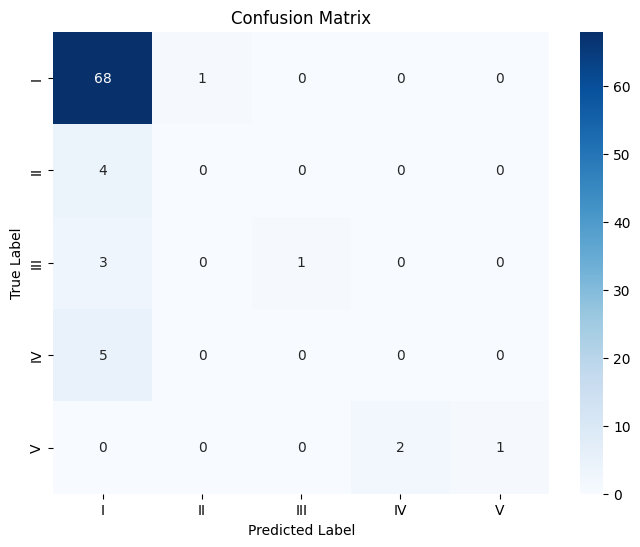

In [119]:
# With bag of word dataframe , we are getting BaggingClassifier as best result
# Classification Report and Confusion Matrix using this model
best_classifier_bow_bagg = BaggingClassifier()
best_classifier_bow_bagg.fit(X_train_bow, y_train_bow)
y_pred_bow = best_classifier_bow_bagg.predict(X_test_bow)
print("\nClassification Report:\n", classification_report(y_test_bow, y_pred_bow))
plot_confusion_matrix(y_test_bow, y_pred_bow,'Confusion Matrix',plt.cm.Blues,best_classifier_bow_bagg)

**Let's now use SMOTE on bag of words data frame and evaluate performance result**

In [120]:
# Apply SMOTE to the bag of word training data
smote_bow = SMOTE(random_state=42, k_neighbors=min(5, len(np.unique(y_train_bow)) - 1))
X_train_resampled_bow, y_train_resampled_bow = smote.fit_resample(X_train_bow, y_train_bow)

In [121]:
#Define a list of classifiers
classifiers_bow_smote = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC()
]

#Train and evaluate each classifier with oversampling
results_smote_bow = []
for classifier in classifiers_bow_smote:
    # Train the classifier
    classifier.fit(X_train_resampled_bow, y_train_resampled_bow)

    # Make predictions on the test set
    y_pred_bow = classifier.predict(X_test_bow)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test_bow, y_pred_bow)
    precision = precision_score(y_test_bow, y_pred_bow, average='weighted')  # Use weighted for multi-class
    recall = recall_score(y_test_bow, y_pred_bow, average='weighted')
    f1 = f1_score(y_test_bow, y_pred_bow, average='weighted')

    # Store the results
    results_smote_bow.append([classifier.__class__.__name__, accuracy, precision, recall, f1])

#Create a DataFrame to display the results
results_smote_bow_df = pd.DataFrame(results_smote_bow, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [122]:
#Print bow smote model result
results_smote_bow_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.788235,0.824874,0.788235,0.796713
1,DecisionTreeClassifier,0.729412,0.749011,0.729412,0.737694
2,RandomForestClassifier,0.741176,0.754454,0.741176,0.741896
3,GradientBoostingClassifier,0.764706,0.771933,0.764706,0.766433
4,XGBClassifier,0.811765,0.793392,0.811765,0.798067
5,GaussianNB,0.811765,0.666807,0.811765,0.732180
6,KNeighborsClassifier,0.070588,0.815803,0.070588,0.074866
7,AdaBoostClassifier,0.647059,0.822090,0.647059,0.711035
8,BaggingClassifier,0.717647,0.729192,0.717647,0.722640
9,SVC,0.823529,0.725630,0.823529,0.751788


* From above result using bag of words dataframe and oversampling , we are not seeing the performance improvement.


**Insight**

* With all different model performance comparsion we can see that , Logistic Regression with TFIDF verctorized data frame is the best model we can see having accuracy 85%.

In [124]:
# So far we have below Best model performance result on test data.  Classification Report and Confusion Matrix for the best model
best_classifier = LogisticRegression(max_iter=1000)
best_classifier.fit(X_train, y_train)
y_train_pred = best_classifier.predict(X_train)
y_pred = best_classifier.predict(X_test)

In [125]:
print("\nClassification Report Test Data:\n", classification_report(y_test, y_pred))


Classification Report Test Data:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        69
           1       0.00      0.00      0.00         4
           2       0.50      0.25      0.33         4
           3       0.67      0.40      0.50         5
           4       0.00      0.00      0.00         3

    accuracy                           0.85        85
   macro avg       0.41      0.33      0.35        85
weighted avg       0.77      0.85      0.80        85



In [126]:
print("\nClassification Report Train Data:\n", classification_report(y_train, y_train_pred))


Classification Report Train Data:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       246
           1       0.95      0.50      0.65        36
           2       1.00      0.41      0.58        27
           3       0.94      0.60      0.73        25
           4       1.00      0.60      0.75         5

    accuracy                           0.86       339
   macro avg       0.95      0.62      0.73       339
weighted avg       0.88      0.86      0.85       339



Confusion Matrix with Test Data:-


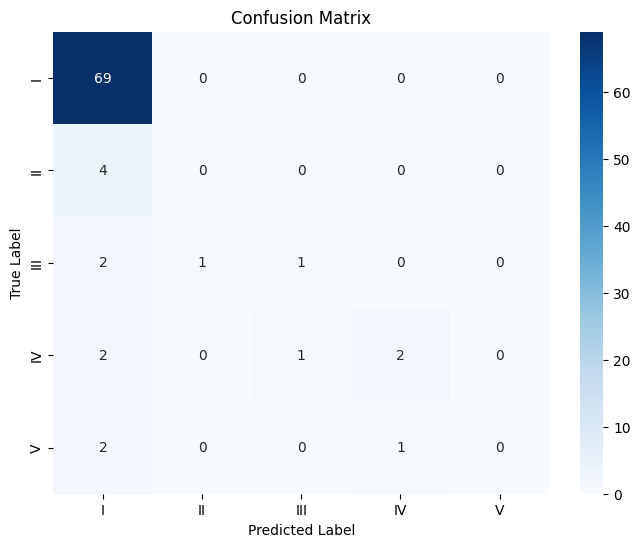

In [127]:
print("Confusion Matrix with Test Data:-")
plot_confusion_matrix(y_test, y_pred,'Confusion Matrix Test Data',plt.cm.Blues,best_classifier)

Confusion Matrix with Train Data:-


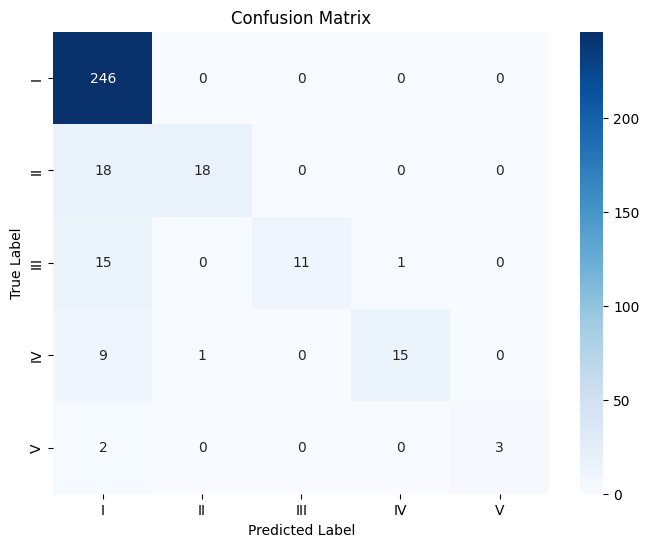

In [128]:
print("Confusion Matrix with Train Data:-")
plot_confusion_matrix(y_train, y_train_pred,'Confusion Matrix Train Data',plt.cm.Blues,best_classifier)

**Conclusion on Model Performance**


Train Confusion Matrix Insights:

* High Accuracy on Class 'I': The model is highly accurate in predicting class 'I' (Accident Level I - least severe), as indicated by the large number of correct predictions (True Positives) along the diagonal. This is expected since class 'I' is the most frequent class in the dataset.

* Misclassifications: The model has some misclassifications, particularly with classes 'II', 'III', 'IV', and 'V'. This is evident from the non-zero values in the off-diagonal cells. For instance, some samples belonging to class 'II' are misclassified as 'I' or 'III'.

* Class Imbalance Effect: The confusion matrix reflects the class imbalance in the dataset, with a larger number of predictions skewed towards class 'I'.

Test Confusion Matrix Insights:

* Generalization to Unseen Data: The test confusion matrix shows how the model generalizes to unseen data. The patterns are generally similar to the train confusion matrix, suggesting that the model is not overfitting too severely.

* Slight Drop in Accuracy: There might be a slight drop in accuracy for some classes on the test data compared to the training data. This is expected as the model is evaluated on unseen samples.

* Challenges with Minority Classes: The model might still struggle with predicting the minority classes (II, III, IV, V) accurately, as indicated by the relatively lower number of true positives for these classes.
Overall Insights and Recommendations:


Model Performance:

* The model seems to perform well overall, particularly in predicting the majority class ('I'). However, there's room for improvement in predicting the minority classes.

